# Discrete DPPs

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload
%autoreload 2

from dppy.discrete_dpps import *
from dppy.discrete_k_dpps import *
import networkx as nx

# Toy example: uniform spanning tree (UST) kernel

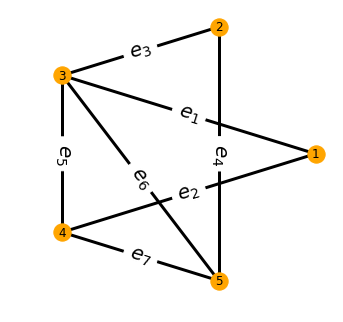

In [3]:
g = nx.Graph()
g.add_edges_from([(0,2), (0,3), (1,2), (1,4), (2,3), (2,4), (3,4)])
nx.set_node_attributes(g, 'color', 'orange')

edge_lab = [r'$e_{}$'.format(i) for i in range(1,g.number_of_edges()+1)]
edge_labels = dict(zip(g.edges(), edge_lab))
vertex_labels = dict(zip(g.nodes(), [i for i in range(1,g.number_of_nodes()+1)]))

fig = plt.figure(figsize=(4,4))

nx.draw_circular(g, node_color='orange', width = 3)
pos=nx.circular_layout(g)
nx.draw_networkx_labels(g,pos,vertex_labels)
nx.draw_networkx_edge_labels(g, pos, edge_labels = edge_labels, font_size= 20)

Inc_Mat=nx.incidence_matrix(g,oriented=True).toarray()

## Initilization of `Discrete_DPP` objects
```python
Discrtete_DPP(ensemble_type, projection, **params)
```
- ```ensemble_type = "K", "L"```
- ```projection = True, False```


If you wish to get basic info about the object you can use either
```python
ensemble_type, projection = "K"/"L", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
print(DPP)
DPP.info()
```

### DPP as $K$-ensemble i.e. `ensemble_type="K"`
$0\preceq K\preceq I$

$P(S\subset X) = \det K_S$

In [4]:
# Projection Kernel onto the rows of the incidence matrix
A = Inc_Mat[:-1,:] # A_zono
K = A.T.dot(np.linalg.inv(A.dot(A.T))).dot(A) # Projection kernel
K_eig_dec = la.eigh(K) #=(eig_vals, eig_vec)

#### Parameters
- `{"K_kernel": K}`
    - $0\preceq K \preceq I$
- `{"K_eig_dec": (eig_vals, eig_vecs)}`
    - $0 \leq eigvals \leq 1$
- `{"A_zono": A}`
    - $A (d\times N)$ with $rank(A)=d$

```python
ensemble_type, projection = "K", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
```

In [5]:
ensemble_type = "K"
for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"K_kernel": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]:
        
        UST = Discrete_DPP(ensemble_type, proj, **par)
        print(UST,"\n")
        
    print()

For projection kernel

DPP defined as K-ensemble with projection kernel
Parametrized by dict_keys(['K_kernel'])
- sampling mode = None
- number of samples = 0 

DPP defined as K-ensemble with projection kernel
Parametrized by dict_keys(['K_eig_dec'])
- sampling mode = None
- number of samples = 0 

DPP defined as K-ensemble with projection kernel
Parametrized by dict_keys(['A_zono'])
- sampling mode = None
- number of samples = 0 


For non-projection kernel

DPP defined as K-ensemble 
Parametrized by dict_keys(['K_kernel'])
- sampling mode = None
- number of samples = 0 

DPP defined as K-ensemble 
Parametrized by dict_keys(['K_eig_dec'])
- sampling mode = None
- number of samples = 0 

DPP defined as K-ensemble with projection kernel
Parametrized by dict_keys(['A_zono'])
- sampling mode = None
- number of samples = 0 




/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:209: UserWarning: Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True
  warn("Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True")


###### From any parametrization you can get back to the inclusion kernel $K$

```python
ensemble_type, projection = "K", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
DPP.compute_K_kernel()
```

In [6]:
ensemble_type = "K"

for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"K_kernel": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]:
        
        UST = Discrete_DPP(ensemble_type, proj, **par)
        UST.compute_K_kernel()
        print()
        
    print()

For projection kernel

K available

K kernel computed via:
- U diag(eig_K) U.T

K kernel computed via:
- 'A_zono' i.e. K = A.T (AA.T)^-1 A


For non-projection kernel

K available

K kernel computed via:
- U diag(eig_K) U.T

K kernel computed via:
- 'A_zono' i.e. K = A.T (AA.T)^-1 A




/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:209: UserWarning: Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True
  warn("Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True")


###### But if you try to compute the $L$ kernel with a $K$ that is a projection you must encounter an error.
```python
ensemble_type, projection = "K", True
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
DPP.compute_L_kernel()
!!!!ERROR!!!!
```

Since $K$ is projection it has some eigenvalues close to 1, so
$L=K(I-K)^{-1}$ cannot be computed

In [7]:
ensemble_type, projection = "K", False# True/False
params = {"K_kernel": K}
UST = Discrete_DPP(ensemble_type, projection, **params)
UST.compute_L_kernel()

L kernel computed via:
- eigendecomposition of K
- eig_L = eig_K/(1-eig_K)


FloatingPointError: Eigenvalues of L kernel cannot be computed
eig_L = eig_K/(1-eig_K)
K kernel has some eig_K very close to 1.
Hint: 'K' kernel might be a projection.

In [8]:
ensemble_type, projection = "K", False# True/False
params = {"K_eig_dec": K_eig_dec}
UST = Discrete_DPP(ensemble_type, projection, **params)
UST.compute_L_kernel()

L kernel computed via:
- eig_L = eig_K/(1-eig_K)


FloatingPointError: Eigenvalues of L kernel cannot be computed
eig_L = eig_K/(1-eig_K)
K kernel has some eig_K very close to 1.
Hint: 'K' kernel might be a projection.

In [9]:
ensemble_type, projection = "K", False# True/False
params = {"A_zono": A}
UST = Discrete_DPP(ensemble_type, projection, **params)
UST.compute_L_kernel()

/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:209: UserWarning: Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True
  warn("Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True")


ValueError: L = K(I-K)^-1 = (I-K)^-1 - I kernel cannot be computed:
K being a projection kernel it has some eigenvalues equal to 1

### DPP as $L$-ensemble i.e. `ensemble_type="L"`
$L\succeq 0$

$P(X=S) \propto \det L_S = \dfrac{\det L_S}{\det(I+L)}$

#### Parameters
- `{"L_kernel": L}`

    - $L\succeq 0$

- `{"L_eig_dec": (eig_vals, eig_vecs)}`

    - $eigvals \geq 0$

- `{"L_gram_factor": Phi}`

    - $L = \Phi^{\top} \Phi$

    - $L' = \Phi\Phi^{\top}$
    
    
```python
ensemble_type, projection = "L", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
```

In [10]:
ensemble_type = "L"
for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"L_kernel": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
        
        UST = Discrete_DPP(ensemble_type, proj, **par)
        print(UST,"\n")
        
    print()

For projection kernel

DPP defined as L-ensemble with projection kernel
Parametrized by dict_keys(['L_kernel'])
- sampling mode = None
- number of samples = 0 

DPP defined as L-ensemble with projection kernel
Parametrized by dict_keys(['L_eig_dec'])
- sampling mode = None
- number of samples = 0 

d=4 < N=7: L dual kernel was computed
DPP defined as L-ensemble with projection kernel
Parametrized by dict_keys(['L_gram_factor'])
- sampling mode = None
- number of samples = 0 


For non-projection kernel

DPP defined as L-ensemble 
Parametrized by dict_keys(['L_kernel'])
- sampling mode = None
- number of samples = 0 

DPP defined as L-ensemble 
Parametrized by dict_keys(['L_eig_dec'])
- sampling mode = None
- number of samples = 0 

d=4 < N=7: L dual kernel was computed
DPP defined as L-ensemble 
Parametrized by dict_keys(['L_gram_factor'])
- sampling mode = None
- number of samples = 0 




/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:148: UserWarning: 'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False
  warn("'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False")


###### From any parametrization you can get back to the marginal kernel $L$

```python
ensemble_type, projection = "L", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
DPP.compute_L_kernel()
```

In [11]:
ensemble_type = "L"
for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"L_kernel": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
        
        UST = Discrete_DPP(ensemble_type, proj, **par)
        UST.compute_L_kernel()
        print()
    
    print()

For projection kernel

L available

L kernel computed via:
- U diag(eig_L) U.T

d=4 < N=7: L dual kernel was computed
L kernel computed via:
- 'L_gram_factor' i.e. L = Phi.T Phi


For non-projection kernel

L available

L kernel computed via:
- U diag(eig_L) U.T

d=4 < N=7: L dual kernel was computed
L kernel computed via:
- 'L_gram_factor' i.e. L = Phi.T Phi




/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:148: UserWarning: 'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False
  warn("'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False")


###### And you should always be able to compute the inclusion kernel $K$
$K=L(I+L)^{-1}$

```python
ensemble_type, projection = "L", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
DPP.compute_K_kernel()
```

In [12]:
ensemble_type = "L"
for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"L_kernel": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
        
        UST = Discrete_DPP(ensemble_type, proj, **par)
        UST.compute_K_kernel()
        print()
    
    print()

For projection kernel

K kernel computed via:
- eigendecomposition of L
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T

K kernel computed via:
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T

d=4 < N=7: L dual kernel was computed
K kernel computed via:
- 'L_gram_factor' i.e. L = Phi.T Phi
- eigendecomposition of L
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T


For non-projection kernel

K kernel computed via:
- eigendecomposition of L
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T

K kernel computed via:
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T

d=4 < N=7: L dual kernel was computed
K kernel computed via:
- 'L_gram_factor' i.e. L = Phi.T Phi
- eigendecomposition of L
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T




/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:148: UserWarning: 'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False
  warn("'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False")


## Sampling
Samples are saved in the list_of_samples attribute
```python
DPP.list_of_samples
```
You can flush previous samples using
```python
DPP.flush_samples()
```

### Exact sampling
- `sampling_mode="GS"` (default)
    - Gram-Schmidt
- `sampling_mode="GS_bis"`
    - Slight modif of "GS"
- `sampling_mode="KuTa12`
    - Kulesza algo

```python
ensemble_type, projection = "K"/"L", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
DPP.sample_exact(sampling_mode)
```

##### $K$-ensemble

In [13]:
ensemble_type, projection = "K", False# True/False
for par in [{"K_kernel": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]:
    
    print(par.keys())
    
    for samp_mod in ["GS", "GS_bis", "KuTa12"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(ensemble_type, projection, **par)
        UST.sample_exact(sampling_mode=samp_mod)
        print(UST.list_of_samples)

    print()

dict_keys(['K_kernel'])
GS
[[0, 2, 1, 3]]
GS_bis
[[1, 0, 2, 6]]
KuTa12
[[0, 5, 3, 4]]

dict_keys(['K_eig_dec'])
GS
[[6, 3, 4, 1]]
GS_bis
[[1, 0, 2, 3]]
KuTa12
[[3, 0, 4, 5]]

dict_keys(['A_zono'])
GS
K kernel computed via:
- 'A_zono' i.e. K = A.T (AA.T)^-1 A
[[2, 6, 1, 3]]
GS_bis
K kernel computed via:
- 'A_zono' i.e. K = A.T (AA.T)^-1 A
[[1, 5, 0, 2]]
KuTa12
K kernel computed via:
- 'A_zono' i.e. K = A.T (AA.T)^-1 A
[[3, 1, 2, 6]]



/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:209: UserWarning: Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True
  warn("Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True")
/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:293: UserWarning: DPP defined via 'A_zono', apriori you want to use 'sample_approx', but you have called 'sample_exact'
  warn("DPP defined via 'A_zono', apriori you want to use 'sample_approx', but you have called 'sample_exact'")


##### $L$-ensemble

In [14]:
ensemble_type, projection = "L", True# True/False
for par in [{"L_kernel": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
    
    print(par.keys())
    
    for samp_mod in ["GS", "GS_bis", "KuTa12"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(ensemble_type, projection, **par)
        UST.sample_exact(sampling_mode=samp_mod)
        print(UST.list_of_samples)

    print()

dict_keys(['L_kernel'])
GS
[[0]]
GS_bis
[[1, 5]]
KuTa12
[[]]

dict_keys(['L_eig_dec'])
GS
[[0]]
GS_bis
[[2]]
KuTa12
[[6, 0]]

dict_keys(['L_gram_factor'])
GS
d=4 < N=7: L dual kernel was computed
[[1, 2, 5, 6]]
GS_bis
d=4 < N=7: L dual kernel was computed
[[2]]
KuTa12
d=4 < N=7: L dual kernel was computed
[[2]]



/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:148: UserWarning: 'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False
  warn("'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False")


### Approximate sampling
```python
sampling_mode=
```
- `"AED"` Add-Exchange-Delete
- `"AD"` Add-Delete
- `"E"` Exchange
- `"zonotope"` Zonotope sampling
    
```python
!!!NOTE!!!
```
- `"AED"` and `"AD"` require the availability of $L$ kernel
- For projection $K$-ensemble you can only use
    - `"E"`
    - `"zonotope"`` if "A_zono" provided


```python
sampl_params={}
```
- `"s_init"` (default None) Starting state of the Markov chain
- `"nb_iter_max"` (default 10) Number of iterations of the chain
- `"T_max"` (default None) Time horizon
- `"size"` (default None) Size of the initial sample for `sampling_mode="AD"/"E"`
    - $=Tr(K)$ for $K$-ensemble with projection kernel and `sampling_mode="E"`

```python
ensemble_type, projection = "K"/"L", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
sampl_params = {"s_init": None, "nb_iter_max": 10, "T_max":, size}
DPP.sample_exact(sampling_mode, **sampl_params)
```

##### For projection $K$-ensemble

In [15]:
ensemble_type, projection = "K", True
for par in [{"K_kernel": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]:
    
    print(par.keys())
    
    for samp_mod in ["E", "zonotope"] if "A_zono" in par.keys() else ["E"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(ensemble_type, projection, **par)
        UST.sample_approx(sampling_mode=samp_mod) # default 10 MC steps
        print(UST.list_of_samples)
        print()

    print()

dict_keys(['K_kernel'])
E
K available
[[[0, 4, 5, 2], [1, 4, 5, 2], [1, 4, 5, 2], [1, 4, 5, 2], [1, 4, 5, 2], [1, 4, 5, 2], [1, 4, 5, 2], [1, 4, 5, 2], [1, 4, 5, 3], [1, 4, 5, 3]]]


dict_keys(['K_eig_dec'])
E
K kernel computed via:
- U diag(eig_K) U.T
[[[1, 3, 5, 4], [1, 3, 5, 4], [1, 3, 5, 4], [1, 3, 5, 4], [1, 3, 5, 0], [1, 3, 5, 0], [1, 3, 5, 0], [1, 2, 5, 0], [1, 2, 3, 0], [1, 5, 3, 0]]]


dict_keys(['A_zono'])
E
K kernel computed via:
- 'A_zono' i.e. K = A.T (AA.T)^-1 A
[[[6, 3, 1, 4], [6, 3, 1, 2], [6, 3, 1, 2], [6, 3, 1, 2], [6, 3, 1, 2], [6, 3, 1, 2], [6, 3, 1, 2], [6, 3, 1, 2], [6, 3, 1, 2], [6, 3, 1, 4]]]

zonotope
[array([[1, 2, 3, 6],
       [1, 2, 3, 6],
       [0, 2, 3, 6],
       [0, 3, 4, 6],
       [1, 3, 4, 6],
       [1, 3, 4, 6],
       [1, 3, 4, 6],
       [1, 3, 4, 6],
       [1, 3, 4, 6],
       [1, 3, 4, 6]])]




##### For NON projection $K$-ensemble

In [16]:
ensemble_type, projection = "K", False

K_np = A.T.dot(A)/5 #/5 (checked by hand) to make sure eigenvalue are in [0,1]
K_np_eig_dec = la.eigh(K_np)

for par in [{"K_kernel": K_np}, {"K_eig_dec": K_np_eig_dec}]:
    
    print(par.keys())
    
    for samp_mod in ["AED", "AD", "E"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(ensemble_type, projection, **par)
        UST.sample_approx(sampling_mode=samp_mod) # default 10 MC steps
        print(UST.list_of_samples)
        print()

    print()

dict_keys(['K_kernel'])
AED
L kernel computed via:
- eigendecomposition of K
- eig_L = eig_K/(1-eig_K)
- U diag(eig_L) U.T
[[[0, 4, 6], [0, 4, 6], [0, 4, 6], [0, 4, 5], [0, 4, 5], [0, 4, 3], [0, 4, 3], [0, 4, 3], [0, 4, 3]]]

AD
L kernel computed via:
- eigendecomposition of K
- eig_L = eig_K/(1-eig_K)
- U diag(eig_L) U.T
[[[4], [4], [4], [4], [4], [4], [4], [4], [4, 2], [4, 2]]]

E
L kernel computed via:
- eigendecomposition of K
- eig_L = eig_K/(1-eig_K)
- U diag(eig_L) U.T
[[[4, 3], [4, 3], [4, 3], [4, 3], [4, 3], [4, 3], [4, 3], [4, 3], [4, 3], [4, 3]]]


dict_keys(['K_eig_dec'])
AED
L kernel computed via:
- eig_L = eig_K/(1-eig_K)
- U diag(eig_L) U.T
[[[1, 2, 6], [1, 2, 6], [1, 2, 6], [1, 2, 6], [1, 2, 6, 3], [1, 2, 6, 3], [1, 2, 6, 3], [1, 2, 6, 3], [1, 6, 3, 0]]]

AD
L kernel computed via:
- eig_L = eig_K/(1-eig_K)
- U diag(eig_L) U.T
[[[2, 3, 4, 0], [2, 3, 4, 0], [2, 4, 0], [2, 4, 0], [2, 4, 0], [2, 4, 0], [2, 0], [2, 0, 4], [2, 0, 4], [2, 0, 4]]]

E
L kernel computed via:
- ei

For $L$-ensemble

In [17]:
ensemble_type, projection = "L", False# True/False
for par in [{"L_kernel": A.T.dot(A)}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
    
    print(par.keys())
    
    for samp_mod in ["AED", "AD", "E"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(ensemble_type, projection, **par)
        UST.sample_approx(sampling_mode=samp_mod) # default 10 MC steps
        print(UST.list_of_samples)
        print()

    print()

dict_keys(['L_kernel'])
AED
L available
[[[0, 5, 6], [0, 5, 6], [0, 5, 6], [0, 5, 6], [0, 5, 6], [0, 6, 4], [0, 6, 4], [0, 6, 4]]]

AD
L available
[[[5, 0, 3, 1], [5, 0, 3, 1], [5, 0, 3, 1], [5, 0, 3, 1], [5, 0, 3, 1], [5, 0, 3, 1], [5, 0, 1], [5, 0, 1], [5, 0, 1, 3], [5, 0, 1, 3]]]

E
L available
[[[6, 2, 0], [6, 2, 0], [6, 2, 0], [6, 2, 0], [6, 2, 0], [6, 2, 0], [6, 2, 0], [6, 4, 0], [6, 4, 0], [6, 4, 0]]]


dict_keys(['L_eig_dec'])
AED
L kernel computed via:
- U diag(eig_L) U.T
[[[0, 2, 3, 6], [0, 2, 3, 6], [0, 2, 3, 6], [0, 2, 3, 6], [0, 2, 3], [0, 2, 3], [0, 2, 3]]]

AD
L kernel computed via:
- U diag(eig_L) U.T
[[[3, 0, 2, 1], [3, 0, 2, 1], [3, 0, 2, 1], [3, 0, 2, 1], [3, 2, 1], [3, 2], [3, 2], [3, 2, 0], [3, 2, 0], [3, 2, 0]]]

E
L kernel computed via:
- U diag(eig_L) U.T
[[[5, 6], [5, 6], [5, 3], [5, 3], [5, 3], [4, 3], [4, 2], [4, 2], [5, 2], [5, 2]]]


dict_keys(['L_gram_factor'])
AED
d=4 < N=7: L dual kernel was computed
L kernel computed via:
- 'L_gram_factor' i.e. L = Phi.

## Plotting
```python
ensemble_type, projection = "K"/"L", True/False
params = {...}
DPP = Discrete_DPP(ensemble_type, projection, **params)
DPP.plot()
```

For K-ensemble

For projection kernel

dict_keys(['K_kernel'])
Inclusion kernel 'K'


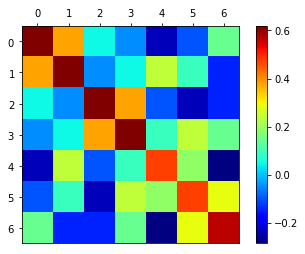


dict_keys(['K_eig_dec'])
K kernel computed via:
- U diag(eig_K) U.T
Inclusion kernel 'K'


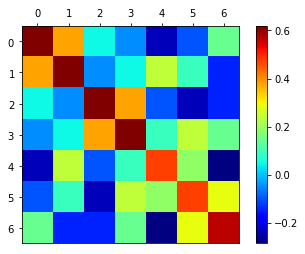


dict_keys(['A_zono'])
K kernel computed via:
- 'A_zono' i.e. K = A.T (AA.T)^-1 A
Inclusion kernel 'K'


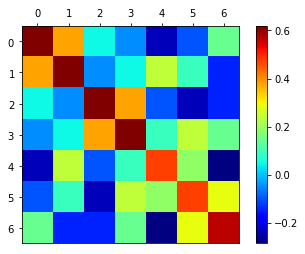



For non-projection kernel

dict_keys(['K_kernel'])
Inclusion kernel 'K'


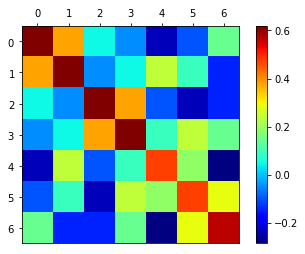


dict_keys(['K_eig_dec'])
K kernel computed via:
- U diag(eig_K) U.T
Inclusion kernel 'K'


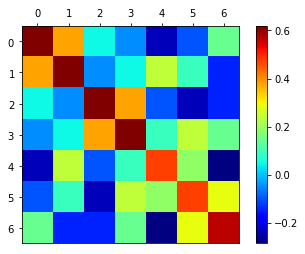


dict_keys(['A_zono'])
K kernel computed via:
- 'A_zono' i.e. K = A.T (AA.T)^-1 A
Inclusion kernel 'K'


/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:209: UserWarning: Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True
  warn("Weird setting: K-ensemble defined via 'A_zono' but 'projection'=False. 'projection' switched to True")


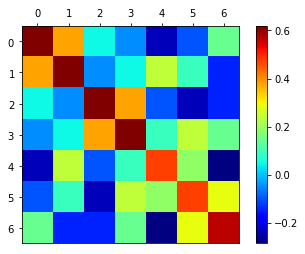




For L-ensemble

For projection kernel

dict_keys(['L_kernel'])
Marginal kernel 'L'


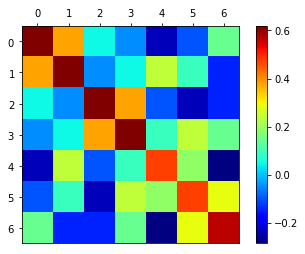


dict_keys(['L_eig_dec'])
L kernel computed via:
- U diag(eig_L) U.T
Marginal kernel 'L'


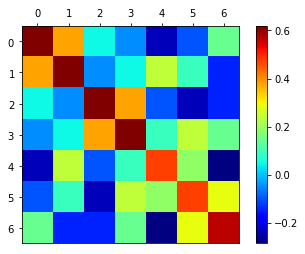


dict_keys(['L_gram_factor'])
d=4 < N=7: L dual kernel was computed
L kernel computed via:
- 'L_gram_factor' i.e. L = Phi.T Phi
Marginal kernel 'L'


/Users/ggautier/Desktop/DPPy/dppy/discrete_dpps.py:148: UserWarning: 'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False
  warn("'L_gram_factor'+'projection'=True is a very weird setting, you may switch to 'projection'=False")


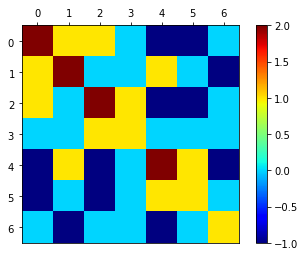



For non-projection kernel

dict_keys(['L_kernel'])
Marginal kernel 'L'


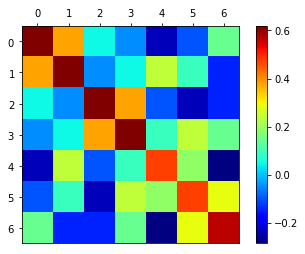


dict_keys(['L_eig_dec'])
L kernel computed via:
- U diag(eig_L) U.T
Marginal kernel 'L'


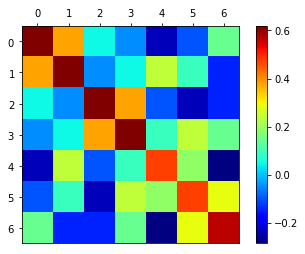


dict_keys(['L_gram_factor'])
d=4 < N=7: L dual kernel was computed
L kernel computed via:
- 'L_gram_factor' i.e. L = Phi.T Phi
Marginal kernel 'L'


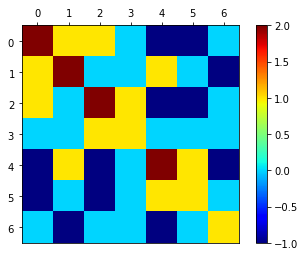

In [18]:
K_ens_par = [{"K_kernel": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]
L_ens_par = [{"L_kernel": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]

for ens in ["K", "L"]:
    
    print("For {}-ensemble\n".format(ens))
    params = K_ens_par if ens == "K" else L_ens_par
    
    for proj in [True, False]:

        print("For {}projection kernel\n".format("non-" if not proj else ""))

        for par in params:
            print(par.keys())
            UST = Discrete_DPP(ens, proj, **par)
            UST.plot()
            print()

        print()
        
    print()